In [1]:
import pandas as pd

In [2]:
df22 = pd.read_csv("data/2022_comptage-velo-donnees-compteurs.csv", on_bad_lines='skip')
df22.head()

,Identifiant du compteur;Nom du compteur;Identifiant du site de comptage;Nom du site de comptage;Comptage horaire;Date et heure de comptage;Date d'installation du site de comptage;Lien vers photo du site de comptage;Coordonnées géographiques
101003096-100003096;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;0;2022-01-01T00:00:00;12-02-22;https://filer.eco-counter-tools.com/file/10/6d3f2edfe0035eaeac2615c5f2c0b5764e9fc678430dd81f7893c4a245470110/15765766519670.jpg;48.83504,2.33314
101003096-100003096;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;13;2022-01-01T01:00:00;12-02-22;https://filer.eco-counter-tools.com/file/10/6d3f2edfe0035eaeac2615c5f2c0b5764e9fc678430dd81f7893c4a245470110/15765766519670.jpg;48.83504,2.33314
101003096-100003096;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;9;2022-01-01T02:00:00;12-02-22;https://filer.eco-counter-tools.com/file/10/6d3f2edfe0035eaeac2615c5f2c0b5764e9fc678430dd81f7893c4a245470110/15765766519670.jpg;48.83504,2.33314
101003096-100003096;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;12;2022-01-01T03:00:00;12-02-22;https://filer.eco-counter-tools.com/file/10/6d3f2edfe0035eaeac2615c5f2c0b5764e9fc678430dd81f7893c4a245470110/15765766519670.jpg;48.83504,2.33314
101003096-100003096;97 avenue Denfert Rochereau SO-NE;100003096;97 avenue Denfert Rochereau;10;2022-01-01T04:00:00;12-02-22;https://filer.eco-counter-tools.com/file/10/6d3f2edfe0035eaeac2615c5f2c0b5764e9fc678430dd81f7893c4a245470110/15765766519670.jpg;48.83504,2.33314


In [3]:
colsToKeep = [
    # 'Identifiant du compteur',
    # 'Nom du compteur',
    # 'Identifiant du site de comptage',
    'Nom du site de comptage',
    'Comptage horaire',
    'Date et heure de comptage',
    #"Date d'installation du site de comptage",
    #'Lien vers photo du site de comptage',
    'Coordonnées géographiques',
    # 'Identifiant technique compteur',
    # 'ID Photos',
    # 'test_lien_vers_photos_du_site_de_comptage_',
    # 'id_photo_1',
    # 'url_sites',
    # 'type_dimage',
    # 'mois_annee_comptage'
]
df22 = pd.read_csv('data/2022_comptage-velo-donnees-compteurs.csv', sep=";", usecols=colsToKeep, on_bad_lines='skip')
df22.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,97 avenue Denfert Rochereau,0,2022-01-01T00:00:00,"48.83504,2.33314"
1,97 avenue Denfert Rochereau,13,2022-01-01T01:00:00,"48.83504,2.33314"
2,97 avenue Denfert Rochereau,9,2022-01-01T02:00:00,"48.83504,2.33314"
3,97 avenue Denfert Rochereau,12,2022-01-01T03:00:00,"48.83504,2.33314"
4,97 avenue Denfert Rochereau,10,2022-01-01T04:00:00,"48.83504,2.33314"


In [4]:
df22.shape

(1471680, 4)

In [5]:
# Séparer latitude et longitude
df22[['latitude', 'longitude']] = df22['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df22["Date et heure de comptage"] = pd.to_datetime(
    df22["Date et heure de comptage"], 
    utc=True,    # rend les dates tz‑aware (UTC)
    errors='coerce'
)

In [6]:
df22_sortedbyplace = df22.sort_values(by=["Nom du site de comptage","Date et heure de comptage"])
df22_sortedbyplace.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
105120,10 avenue de la Grande Armée,4,2022-01-01 00:00:00+00:00,"48.8748,2.2924",48.8748,2.2924
105121,10 avenue de la Grande Armée,8,2022-01-01 01:00:00+00:00,"48.8748,2.2924",48.8748,2.2924
105122,10 avenue de la Grande Armée,15,2022-01-01 02:00:00+00:00,"48.8748,2.2924",48.8748,2.2924
105123,10 avenue de la Grande Armée,17,2022-01-01 03:00:00+00:00,"48.8748,2.2924",48.8748,2.2924
105124,10 avenue de la Grande Armée,4,2022-01-01 04:00:00+00:00,"48.8748,2.2924",48.8748,2.2924


In [7]:
cols = ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude"]
df22_sites = df22[cols].drop_duplicates(subset=["Nom du site de comptage"])
print(df22_sites.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df22_sites

(70, 4)


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude
0,97 avenue Denfert Rochereau,"48.83504,2.33314",48.83504,2.33314
8760,105 rue La Fayette,"48.87773,2.3506",48.87773,2.3506
17520,106 avenue Denfert Rochereau,"48.83505,2.33333",48.83505,2.33333
26280,100 rue La Fayette,"48.87813,2.3497",48.87813,2.3497
35040,135 avenue Daumesnil,"48.843435,2.383378",48.843435,2.383378
43800,158 rue de Rivoli (Voie Bus),"48.8611449,2.3401251",48.8611449,2.3401251
52560,28 boulevard Diderot,"48.84613,2.37559",48.84613,2.37559
61320,39 quai François Mauriac,"48.83436,2.377",48.83436,2.377
70080,18 quai de l'Hôtel de Ville,"48.85372,2.35702",48.85372,2.35702
78840,27 boulevard Diderot,"48.846099,2.375456",48.846099,2.375456


In [8]:
import geopandas as gpd

# 1. Copie du DataFrame de base
df = df22_sites.copy()

# 2. Nettoyage des coordonnées
df['latitude']  = pd.to_numeric(df['latitude'],  errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])

# 3. Création d’un GeoDataFrame à partir du DataFrame nettoyé
gdf_sites = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 4. Chargement et projection des arrondissements
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
gdf_arr = gpd.read_file(url_geojson)
gdf_arr = gdf_arr.to_crs(epsg=4326)

# 5. Spatial join — points dans les polygones
gdf_joined = gpd.sjoin(gdf_sites, gdf_arr, how="left", predicate="within")

# 6. Sélection & renommage des colonnes d’intérêt
df22_final = gdf_joined[
    ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude", "l_ar"]
].rename(columns={"l_ar": "arrondissement"})

df22_final


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,97 avenue Denfert Rochereau,"48.83504,2.33314",48.835040,2.333140,14ème Ardt
8760,105 rue La Fayette,"48.87773,2.3506",48.877730,2.350600,10ème Ardt
17520,106 avenue Denfert Rochereau,"48.83505,2.33333",48.835050,2.333330,14ème Ardt
26280,100 rue La Fayette,"48.87813,2.3497",48.878130,2.349700,10ème Ardt
35040,135 avenue Daumesnil,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
43800,158 rue de Rivoli (Voie Bus),"48.8611449,2.3401251",48.861145,2.340125,1er Ardt
52560,28 boulevard Diderot,"48.84613,2.37559",48.846130,2.375590,12ème Ardt
61320,39 quai François Mauriac,"48.83436,2.377",48.834360,2.377000,13ème Ardt
70080,18 quai de l'Hôtel de Ville,"48.85372,2.35702",48.853720,2.357020,4ème Ardt
78840,27 boulevard Diderot,"48.846099,2.375456",48.846099,2.375456,12ème Ardt


In [9]:
import pandas as pd

def list_to_semicolon_str(lst):
    return "; ".join(str(v) for v in lst if pd.notna(v))

# Regroupement par arrondissement et concaténation des coordonnées
tableau_arr = (
    df22_final
    .groupby("arrondissement", dropna=False)
    .agg({
        "Coordonnées géographiques": lambda x: list_to_semicolon_str(x),
        "latitude": lambda x: list_to_semicolon_str(x),
        "longitude": lambda x: list_to_semicolon_str(x)
    })
    .reset_index()
)

# Trier les arrondissements par numéro — si le nom contient un nombre
# On extrait le premier nombre trouvé dans la chaîne (ex “12e”, “8”, etc.)
tableau_arr['arr_num'] = (
    tableau_arr['arrondissement']
    .str.extract(r'(\d+)', expand=False)  # capture les chiffres
    .astype(float, errors='ignore')       # convertit en float si possible
)

# Trier par ce numéro, en mettant les NaN (arrondissements sans numéro numérique) à la fin
tableau_arr = tableau_arr.sort_values(
    by='arr_num', na_position='last'
).drop(columns='arr_num').reset_index(drop=True)

# Optionnel : afficher tout, mais attention si le tableau est très long
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tableau_arr


,arrondissement,Coordonnées géographiques,latitude,longitude
0,1er Ardt,"48.8611449,2.3401251; 48.8635,2.32239",48.8611449; 48.8635,2.3401251; 2.32239
1,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
2,3ème Ardt,"48.86502,2.35387",48.86502,2.35387
3,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
4,5ème Ardt,"48.85013,2.35423; 48.851525,2.3432985; 48.8511307,2.3456784; 48.8511307,2.3456784",48.85013; 48.851525; 48.8511307; 48.8511307,2.35423; 2.3432985; 2.3456784; 2.3456784
5,7ème Ardt,"48.86179,2.32014; 48.86279,2.31055; 48.8629,2.3118; 48.84641,2.31524",48.86179; 48.86279; 48.8629; 48.84641,2.32014; 2.31055; 2.3118; 2.31524
6,8ème Ardt,"48.86999,2.30743; 48.86999,2.30722; 48.86373,2.31973; 48.86462,2.31444",48.86999; 48.86999; 48.86373; 48.86462,2.30743; 2.30722; 2.31973; 2.31444
7,10ème Ardt,"48.87773,2.3506; 48.87813,2.3497; 48.87756,2.35535; 48.87769,2.35475",48.87773; 48.87813; 48.87756; 48.87769,2.3506; 2.3497; 2.35535; 2.35475
8,11ème Ardt,"48.86149,2.37376; 48.86155,2.37407; 48.86077,2.37305; 48.860852,2.372279; 48.860528,2.388364",48.86149; 48.86155; 48.86077; 48.860852; 48.860528,2.37376; 2.37407; 2.37305; 2.372279; 2.388364
9,12ème Ardt,"48.843435,2.383378; 48.84613,2.37559; 48.846099,2.375456; 48.8295233,2.38699; 48.83033052177593,2.400550837519253; 48.83848,2.37587",48.843435; 48.84613; 48.846099; 48.8295233; 48.83033052177593; 48.83848,2.383378; 2.37559; 2.375456; 2.38699; 2.400550837519253; 2.37587


In [10]:
df22.shape

(1471680, 6)

In [11]:
df22["Date et heure de comptage"] = pd.to_datetime(df22["Date et heure de comptage"], utc=True)
df22["Date et heure de comptage"] = df22["Date et heure de comptage"].dt.tz_convert("Europe/Paris")
date_min = df22["Date et heure de comptage"].min()
date_max = df22["Date et heure de comptage"].max()

print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)

Date la plus ancienne : 2022-01-01 01:00:00+01:00
Date la plus récente : 2023-01-01 00:00:00+01:00


In [17]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2022
mois = [f"2022-{m:02d}" for m in range(1, 13)]


results_temp = []

# Groupement par arrondissement (issu de df22_final)
for arr, df_arr in df22_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_temp = []

        # Boucle sur les sites de l’arrondissement
        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=apparent_temperature"
                    "&timezone=Europe/Paris"
                )

                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Sécurité si données manquantes
                if "hourly" in data and "apparent_temperature" in data["hourly"]:
                    toutes_temp.extend(data["hourly"]["apparent_temperature"])

            except Exception as e:
                print(f"❌ Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = (
            sum(toutes_temp) / len(toutes_temp)
            if toutes_temp else None
        )

    results_temp.append(lignes_arr)

# DataFrame final
df22_temp_mensuel = pd.DataFrame(results_temp)

# Tri par numéro d’arrondissement
df22_temp_mensuel["arr_num"] = (
    df22_temp_mensuel["arrondissement"]
    .str.extract(r"(\d+)")
    .astype(float)
)

df22_temp_mensuel = (
    df22_temp_mensuel
    .sort_values("arr_num", na_position="last")
    .drop(columns="arr_num")
    .reset_index(drop=True)
)

# Sauvegarde locale
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2022_temperature_mensuelle_moyenne_par_arrondissement.csv"
)

df22_temp_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")


# Affichage
with pd.option_context(
    'display.max_columns', None,
    'display.max_colwidth', None,
    'display.width', None
):
    print(df22_temp_mensuel)
    


✅ Data sauvegardée dans data/2022_temperature_mensuelle_moyenne_par_arrondissement.csv
   arrondissement   2022-01   2022-02   2022-03   2022-04    2022-05  \
0        1er Ardt  1.043481  3.080283  5.645228  7.725139  14.794086   
1       2ème Ardt  1.000806  3.037351  5.601210  7.682083  14.749597   
2       3ème Ardt  1.047849  3.086161  5.648790  7.728750  14.799059   
3       4ème Ardt  1.131250  3.168676  5.819153  7.830208  14.916667   
4       5ème Ardt  1.109845  3.149107  5.801915  7.811944  14.897312   
5       7ème Ardt  1.144120  3.182329  5.768313  7.832396  14.909375   
6       8ème Ardt  1.085685  3.123475  5.687500  7.768299  14.839483   
7      10ème Ardt  0.924563  2.960454  5.523555  7.603056  14.665591   
8      11ème Ardt  0.852312  2.942976  5.572043  7.582389  14.742500   
9      12ème Ardt  0.907661  3.047966  5.725717  7.732431  14.911380   
10     13ème Ardt  0.982426  3.071689  5.736374  7.744983  14.875655   
11     14ème Ardt  0.918710  2.954494  5.606398  

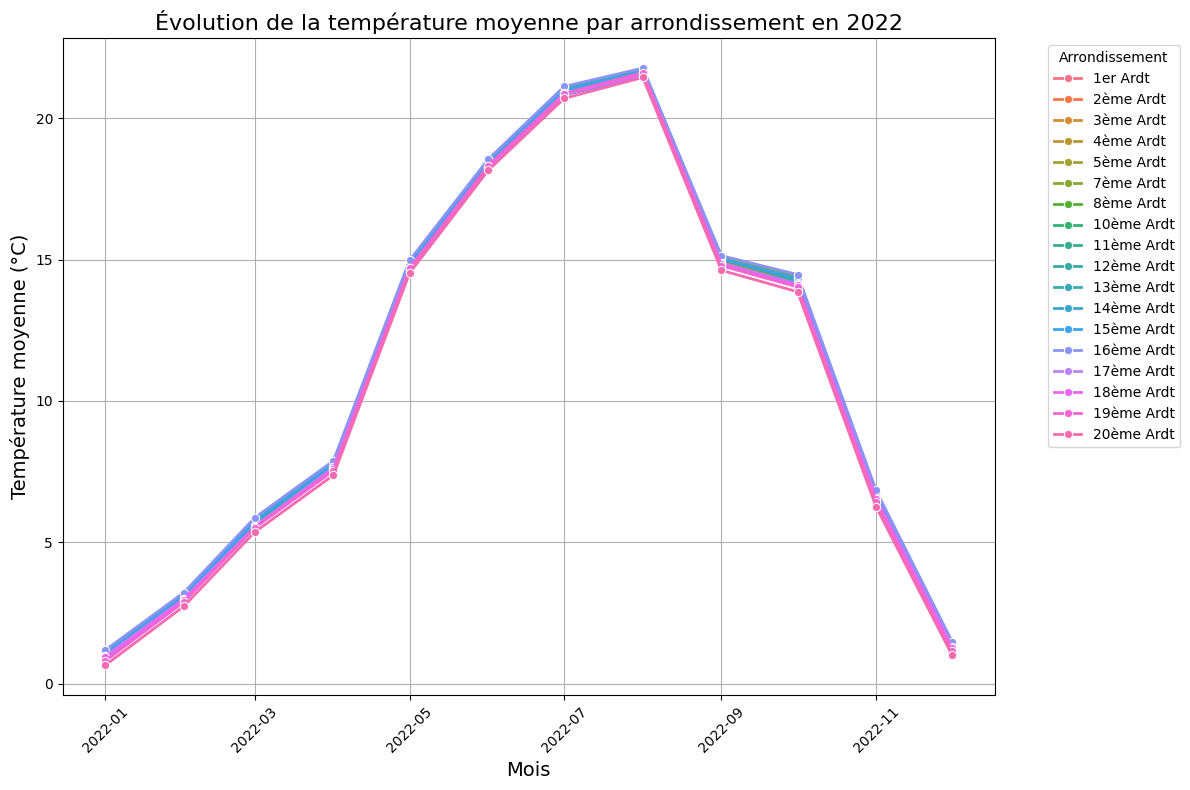

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2022_temperature_mensuelle_moyenne_par_arrondissement.csv"
df22_temp_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df22_long = df22_temp_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="temperature_moyenne_°C"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df22_long["mois"] = pd.to_datetime(df22_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df22_long,
    x="mois",
    y="temperature_moyenne_°C",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la température moyenne par arrondissement en 2022', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Température moyenne (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [13]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2022
mois = [f"2022-{m:02d}" for m in range(1, 13)]

results_precip = []

for arr, df_arr in df22_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_precip = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=precipitation"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Vérifie que la clé existe et étend la liste
                if "hourly" in data and "precipitation" in data["hourly"]:
                    toutes_precip.extend(data["hourly"]["precipitation"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        # Somme des précipitations du mois (total pour l'arrondissement)
        lignes_arr[periode] = sum(toutes_precip) if toutes_precip else None

    results_precip.append(lignes_arr)

df22_precip_mensuel = pd.DataFrame(results_precip)
df22_precip_mensuel["arr_num"] = df22_precip_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df22_precip_mensuel = df22_precip_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2022_precipitations_mensuelles_moyennes_par_arrondissement.csv"
)

df22_precip_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df22_precip_mensuel)  # ou df22_precip_mensuel selon nom variable

✅ Data sauvegardée dans data/2022_precipitations_mensuelles_moyennes_par_arrondissement.csv
   arrondissement  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  \
10       1er Ardt     99.0     54.6     88.0    105.6     75.8    186.8   
12      2ème Ardt     49.5     27.3     44.0     52.8     37.9     93.4   
13      3ème Ardt     49.5     27.3     44.0     52.8     37.9     93.4   
14      4ème Ardt     95.6     54.0     95.0    112.4     89.0    195.6   
15      5ème Ardt    191.2    108.0    190.0    224.8    178.0    391.2   
16      7ème Ardt    196.3    108.9    179.5    214.6    158.2    378.0   
17      8ème Ardt    198.0    109.2    176.0    211.2    151.6    373.6   
0      10ème Ardt    198.0    109.2    176.0    211.2    151.6    373.6   
1      11ème Ardt    265.0    150.0    210.0    280.0    212.5    442.5   
2      12ème Ardt    309.0    156.0    242.4    336.0    274.2    554.4   
3      13ème Ardt    397.2    212.0    351.6    448.8    360.8    760.8   
4      1

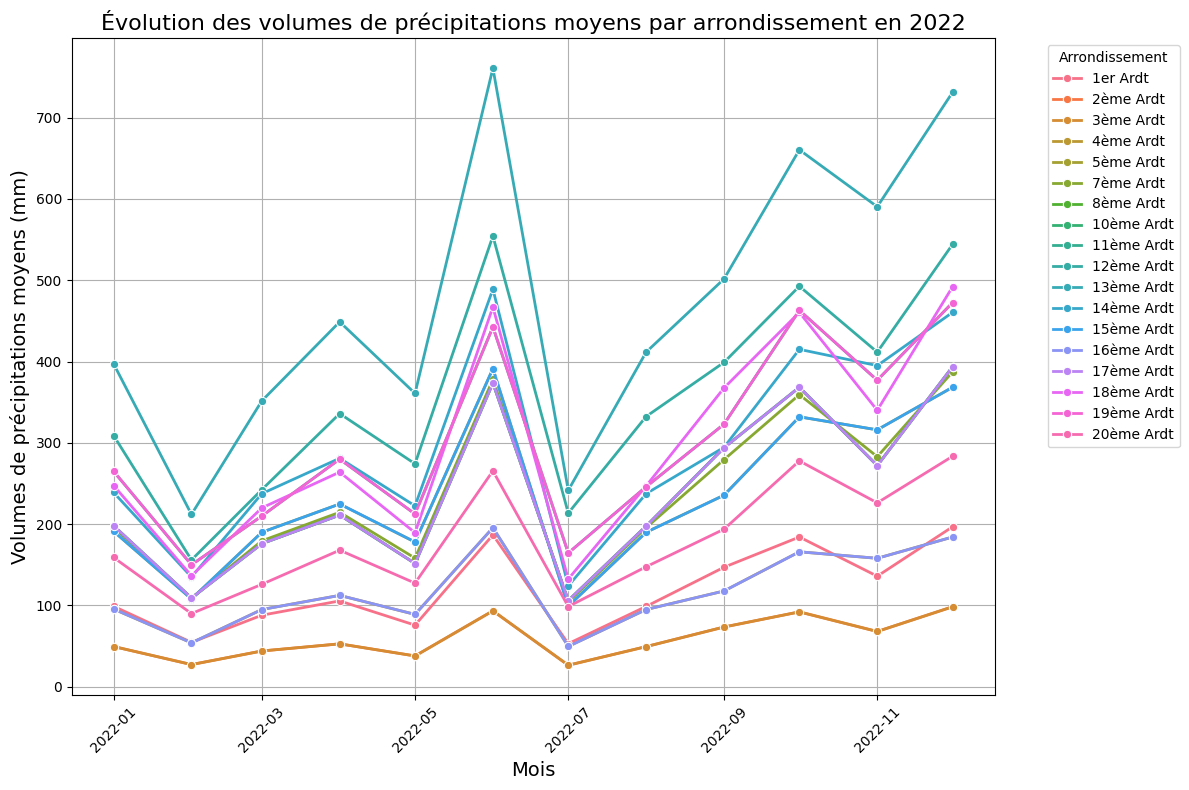

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2022_precipitations_mensuelles_moyennes_par_arrondissement.csv"
df22_precip_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df22_long = df22_precip_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="volumes_precipitations_moyens_mm"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df22_long["mois"] = pd.to_datetime(df22_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df22_long,
    x="mois",
    y="volumes_precipitations_moyens_mm",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution des volumes de précipitations moyens par arrondissement en 2022', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Volumes de précipitations moyens (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2022
mois = [f"2022-{m:02d}" for m in range(1, 13)]

results_cloud = []

for arr, df_arr in df22_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_cloud = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=cloud_cover"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                if "hourly" in data and "cloud_cover" in data["hourly"]:
                    toutes_cloud.extend(data["hourly"]["cloud_cover"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = sum(toutes_cloud)/len(toutes_cloud) if toutes_cloud else None

    results_cloud.append(lignes_arr)

df22_cloud_mensuel = pd.DataFrame(results_cloud)
df22_cloud_mensuel["arr_num"] = df22_cloud_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df22_cloud_mensuel = df22_cloud_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2022_cloudcover_mensuel_moyen_par_arrondissement.csv"
)

df22_cloud_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df22_cloud_mensuel)


✅ Data sauvegardée dans data/2022_cloudcover_mensuel_moyen_par_arrondissement.csv
   arrondissement    2022-01    2022-02    2022-03    2022-04    2022-05  \
10       1er Ardt  74.881720  64.502976  50.314516  67.601389  62.463710   
12      2ème Ardt  74.881720  64.502976  50.314516  67.601389  62.463710   
13      3ème Ardt  74.881720  64.502976  50.314516  67.601389  62.463710   
14      4ème Ardt  75.096774  64.278274  50.163978  67.162500  62.153226   
15      5ème Ardt  75.096774  64.278274  50.163978  67.162500  62.153226   
16      7ème Ardt  74.935484  64.446801  50.276882  67.491667  62.386089   
17      8ème Ardt  74.881720  64.502976  50.314516  67.601389  62.463710   
0      10ème Ardt  74.881720  64.502976  50.314516  67.601389  62.463710   
1      11ème Ardt  74.014785  64.357143  49.520161  67.784722  62.810484   
2      12ème Ardt  74.500000  63.513393  49.653226  67.372222  62.301075   
3      13ème Ardt  74.798387  63.895833  49.908602  67.267361  62.227151   
4     

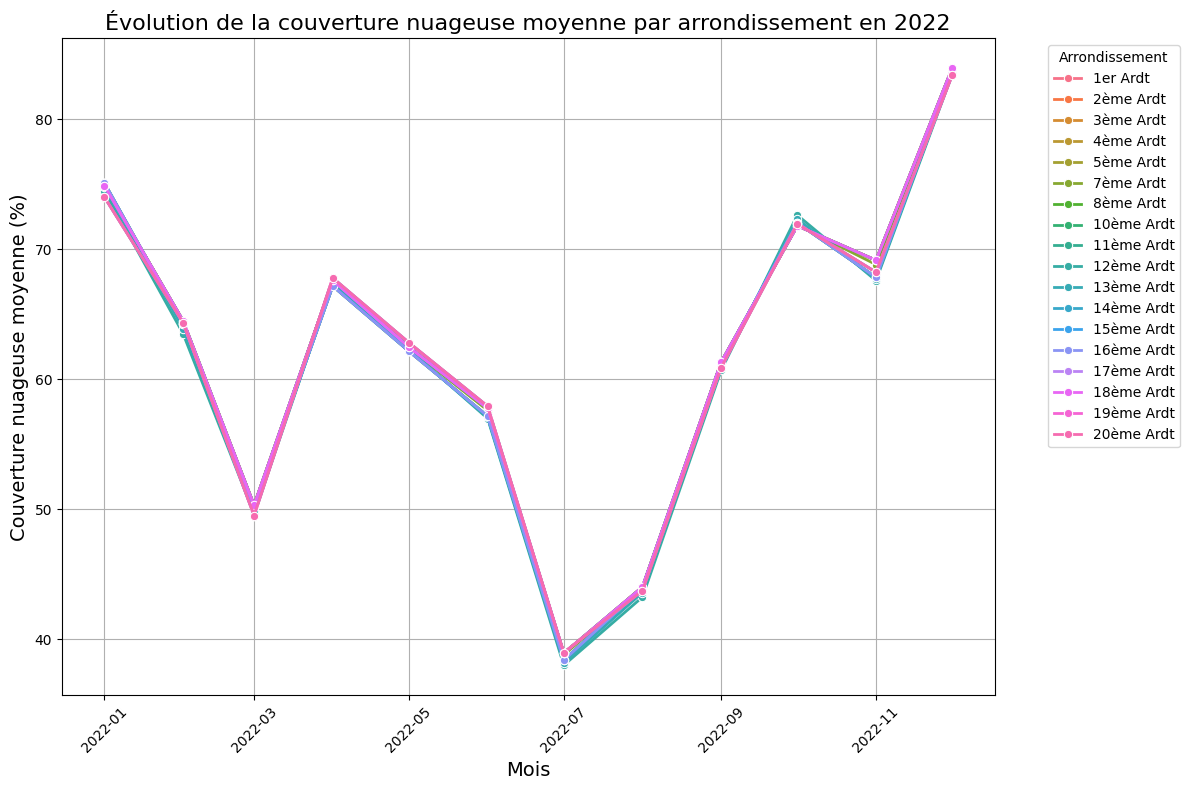

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2022_cloudcover_mensuel_moyen_par_arrondissement.csv"
df22_cloud_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df22_long = df22_cloud_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="couverture_nuageuse_moyenne_%"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df22_long["mois"] = pd.to_datetime(df22_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df22_long,
    x="mois",
    y="couverture_nuageuse_moyenne_%",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la couverture nuageuse moyenne par arrondissement en 2022', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Couverture nuageuse moyenne (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
